# Employee Attrition for Healthcare

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [270]:
df_raw= pd.read_csv('watson_healthcare_modified.csv')
df=df_raw.copy()
pd.set_option('display.max_columns', None)

In [271]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Processing

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,1676.0,1.456796e+06,248748.624383,1025177.0,1235831.75,1464606.0,1667992.00,1886378.0
Age,1676.0,3.686635e+01,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,8.005579e+02,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957e+00,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518e+00,1.025835,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1676.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1676.0,2.714797e+00,1.097534,1.0,2.00,3.0,4.00,4.0
HourlyRate,1676.0,6.547017e+01,20.207572,30.0,48.00,65.5,83.00,100.0
JobInvolvement,1676.0,2.724940e+00,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826e+00,1.113423,1.0,1.00,2.0,3.00,5.0


In [274]:
df.drop('EmployeeID',axis=1,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

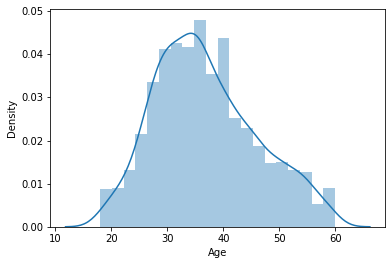

In [275]:
sns.distplot(df['Age'])

In [276]:
df['Attrition'].dtype

dtype('O')

In [277]:
df["Attrition"].unique()

array(['No', 'Yes'], dtype=object)

In [278]:
df['Attrition']=df['Attrition'].map({'No':0, 'Yes':1})

In [279]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [280]:
BusinessTravel=pd.get_dummies(df['BusinessTravel'],drop_first=True)

In [281]:
df=pd.concat([df,BusinessTravel],axis=1)
df.drop('BusinessTravel',axis=1,inplace=True)

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

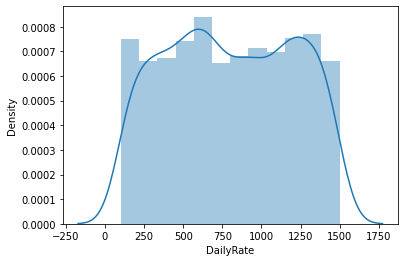

In [282]:
sns.distplot(df['DailyRate'])

In [283]:
df['Department'].dtype

dtype('O')

In [284]:
df['Department'].unique()

array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)

In [285]:
Department=pd.get_dummies(df['Department'],drop_first=True)

In [286]:
df=pd.concat([df,Department],axis=1)
df.drop('Department',axis=1,inplace=True)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

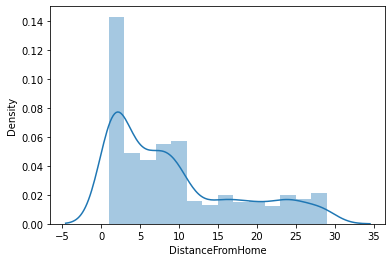

In [287]:
sns.distplot(df['DistanceFromHome'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

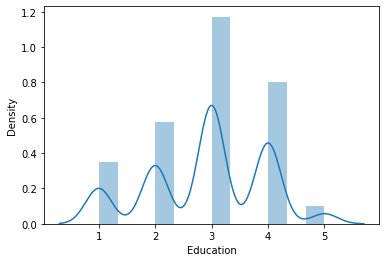

In [288]:
sns.distplot(df['Education'])

In [289]:
df.groupby('Education').size()

Education
1    196
2    322
3    655
4    447
5     56
dtype: int64

In [290]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [291]:
df.groupby('EducationField').size()

EducationField
Human Resources      29
Life Sciences       697
Marketing           189
Medical             524
Other                88
Technical Degree    149
dtype: int64

In [292]:
EducationField=pd.get_dummies(df['EducationField'],drop_first=True)

In [293]:
df=pd.concat([df,EducationField],axis=1)
df.drop('EducationField',axis=1,inplace=True)

In [294]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree
0,41,0,1102,1,2,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0
1,49,0,279,8,1,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0
2,37,1,1373,2,2,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0
3,33,0,1392,3,4,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0
4,27,0,591,2,1,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   int64 
 2   DailyRate                 1676 non-null   int64 
 3   DistanceFromHome          1676 non-null   int64 
 4   Education                 1676 non-null   int64 
 5   EmployeeCount             1676 non-null   int64 
 6   EnvironmentSatisfaction   1676 non-null   int64 
 7   Gender                    1676 non-null   object
 8   HourlyRate                1676 non-null   int64 
 9   JobInvolvement            1676 non-null   int64 
 10  JobLevel                  1676 non-null   int64 
 11  JobRole                   1676 non-null   object
 12  JobSatisfaction           1676 non-null   int64 
 13  MaritalStatus             1676 non-null   object
 14  MonthlyIncome           

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

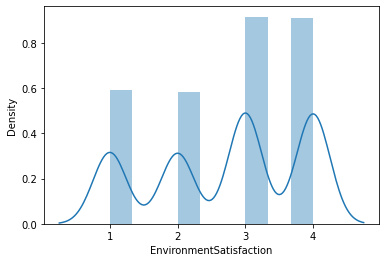

In [296]:
sns.distplot(df['EnvironmentSatisfaction'])

In [297]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [298]:
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

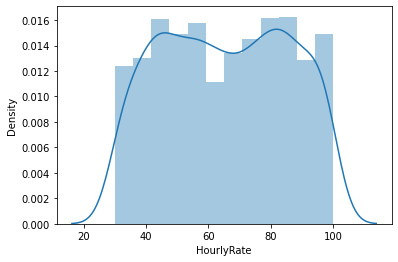

In [299]:
sns.distplot(df['HourlyRate'])

In [300]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree
0,41,0,1102,1,2,1,2,1,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0
1,49,0,279,8,1,1,3,0,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0
2,37,1,1373,2,2,1,4,0,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0
3,33,0,1392,3,4,1,4,1,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0
4,27,0,591,2,1,1,1,0,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0


<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

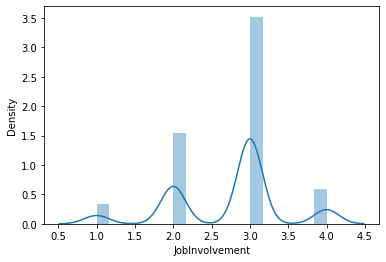

In [301]:
sns.distplot(df['JobInvolvement'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

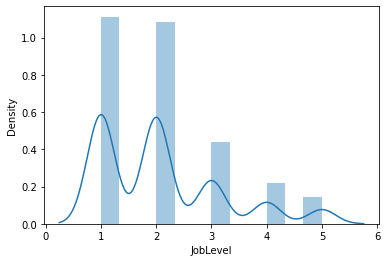

In [302]:
sns.distplot(df['JobLevel'])

In [303]:
df['JobRole'].unique()

array(['Nurse', 'Other', 'Therapist', 'Administrative', 'Admin'],
      dtype=object)

In [304]:
JobRole=pd.get_dummies(df['JobRole'],drop_first=True)

In [305]:
df=pd.concat([df,JobRole],axis=1)
df.drop('JobRole',axis=1,inplace=True)

In [306]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist
0,41,0,1102,1,2,1,2,1,94,3,2,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0,0,1,0,0
1,49,0,279,8,1,1,3,0,61,2,2,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,1,4,0,92,2,1,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
3,33,0,1392,3,4,1,4,1,56,3,1,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,0,40,3,1,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

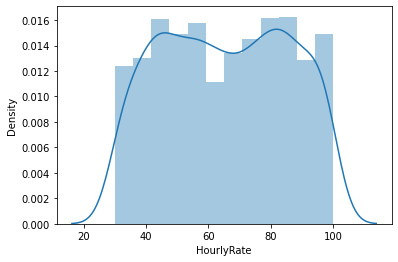

In [307]:
sns.distplot(df['HourlyRate'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

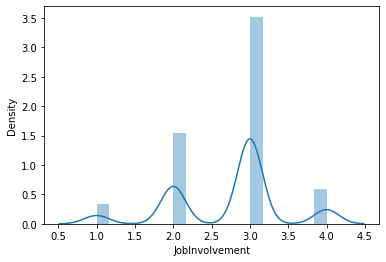

In [308]:
sns.distplot(df['JobInvolvement'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

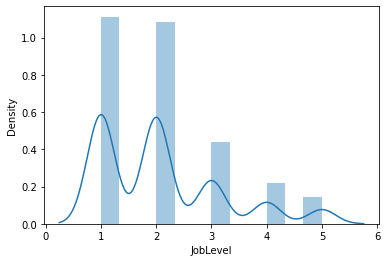

In [309]:
sns.distplot(df['JobLevel'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

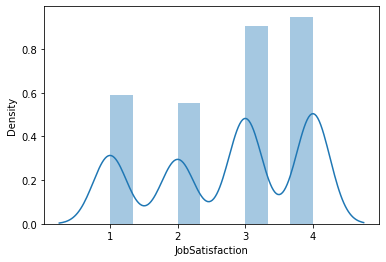

In [310]:
sns.distplot(df['JobSatisfaction'])

In [311]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [312]:
MaritalStatus=pd.get_dummies(df['MaritalStatus'])

In [313]:
df=pd.concat([df,MaritalStatus],axis=1)
df.drop('MaritalStatus',axis=1,inplace=True)

In [314]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Divorced,Married,Single
0,41,0,1102,1,2,1,2,1,94,3,2,4,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,49,0,279,8,1,1,3,0,61,2,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,0,92,2,1,3,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,33,0,1392,3,4,1,4,1,56,3,1,3,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,0,40,3,1,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

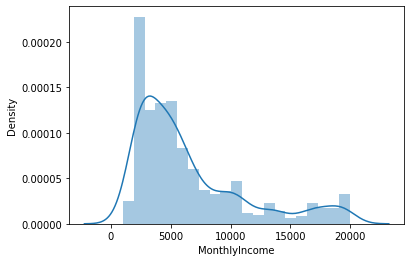

In [315]:
sns.distplot(df['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

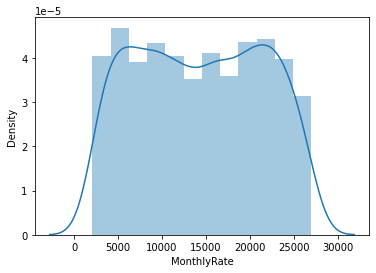

In [316]:
sns.distplot(df['MonthlyRate'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

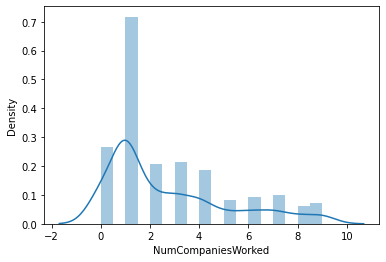

In [317]:
sns.distplot(df['NumCompaniesWorked'])

In [318]:
df['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [319]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [320]:
df.drop('Over18',axis=1,inplace=True)

In [321]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [322]:
df['OverTime']=df['OverTime'].map({'Yes':1, 'No':0})

<AxesSubplot:xlabel='Shift', ylabel='Density'>

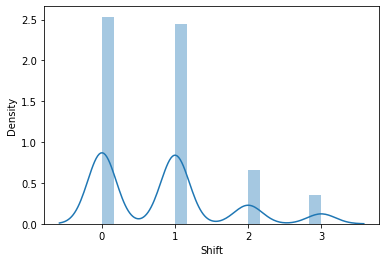

In [323]:
sns.distplot(df['Shift'])

In [324]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Travel_Frequently',
       'Travel_Rarely', 'Maternity', 'Neurology', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Administrative', 'Nurse',
       'Other', 'Therapist', 'Divorced', 'Married', 'Single'],
      dtype='object')

In [325]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [326]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Divorced,Married,Single
0,41,0,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,33,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0


## EDA

In [327]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Travel_Frequently',
       'Travel_Rarely', 'Maternity', 'Neurology', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Administrative', 'Nurse',
       'Other', 'Therapist', 'Divorced', 'Married', 'Single'],
      dtype='object')

In [328]:
lt=['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

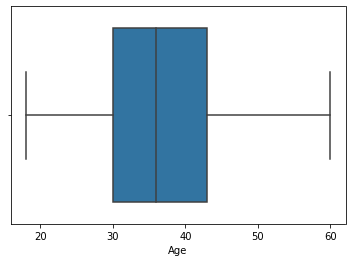

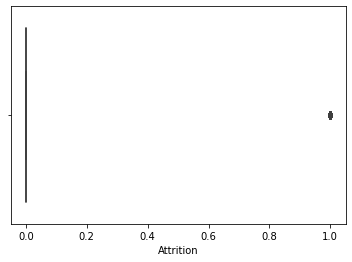

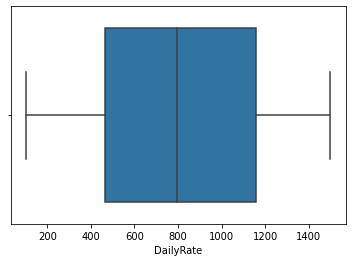

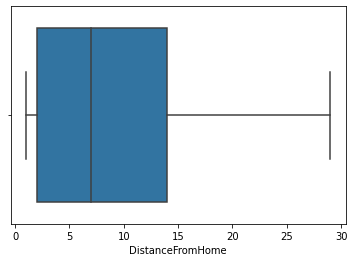

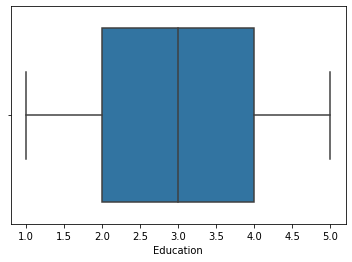

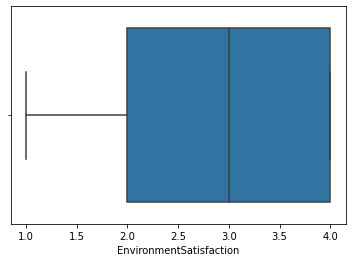

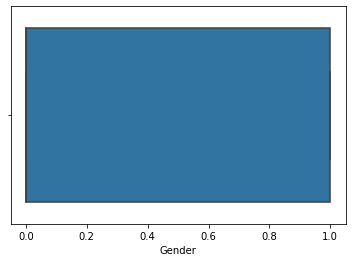

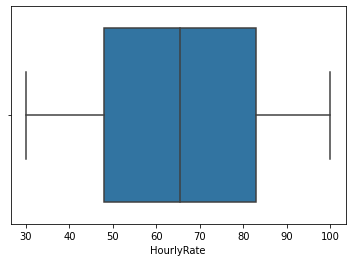

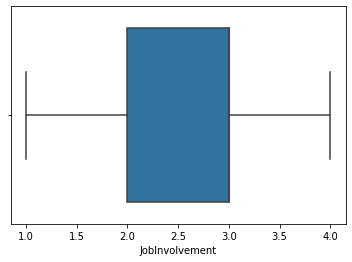

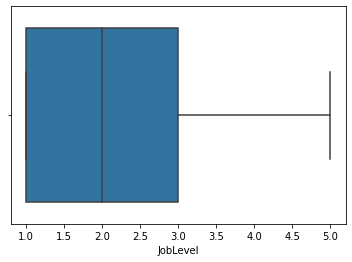

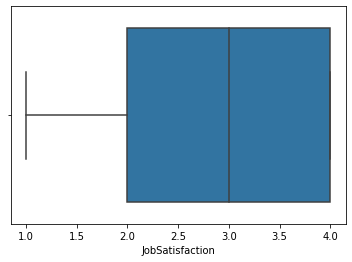

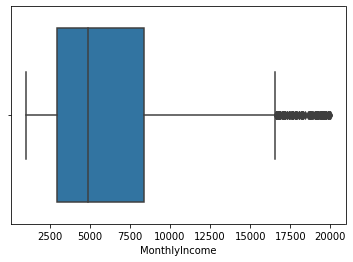

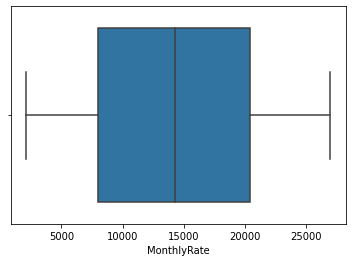

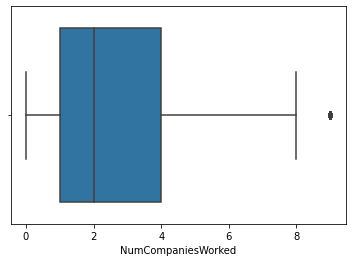

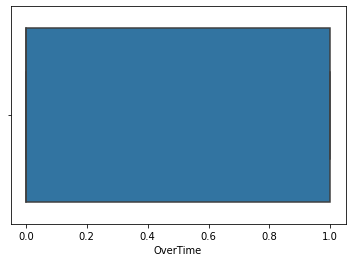

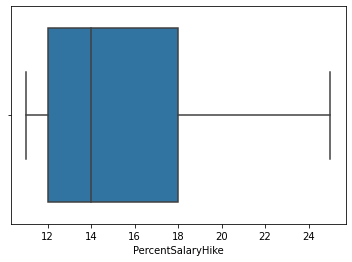

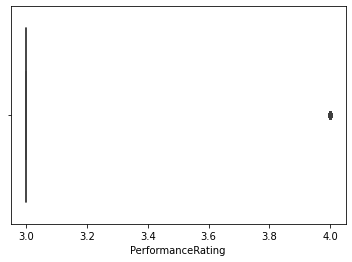

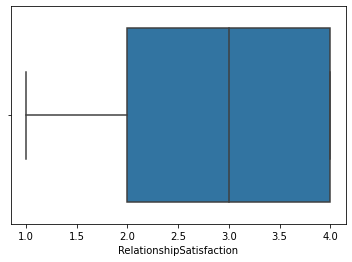

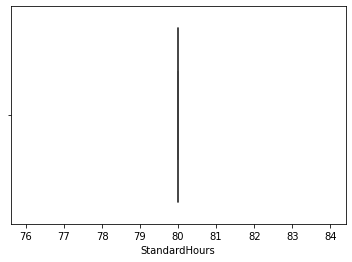

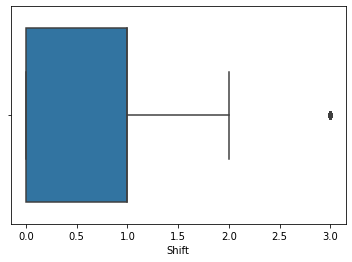

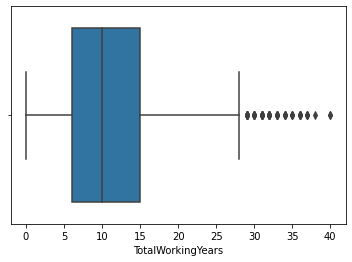

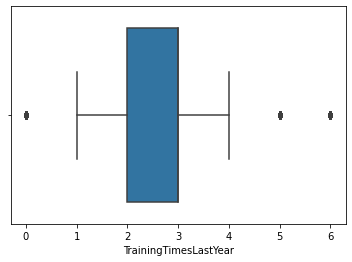

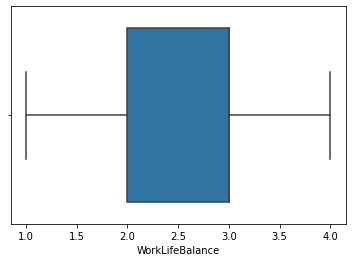

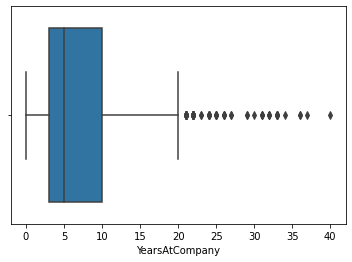

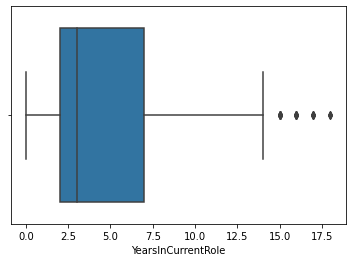

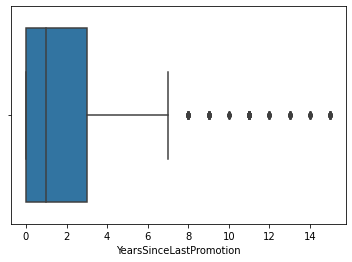

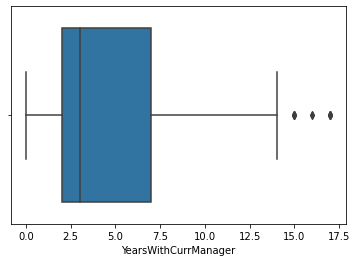

In [329]:
for i in lt:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

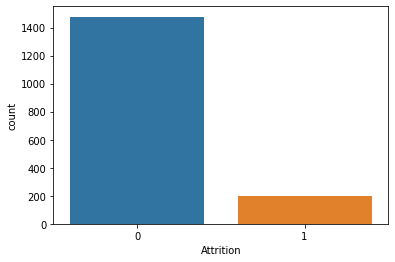

In [330]:
sns.countplot(df['Attrition'])

In [331]:
df.shape

(1676, 43)

## Split Data

In [333]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

<AxesSubplot:xlabel='Attrition', ylabel='count'>

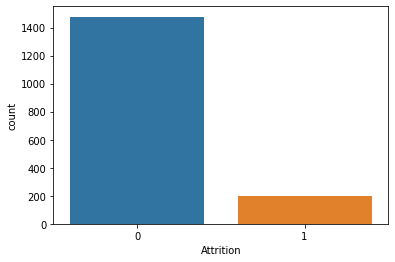

In [334]:
sns.countplot(y)

## Impalenced Data

In [332]:
from imblearn.combine import SMOTETomek

In [336]:
smt=SMOTETomek()
X_new,y_new=smt.fit_resample(X,y)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

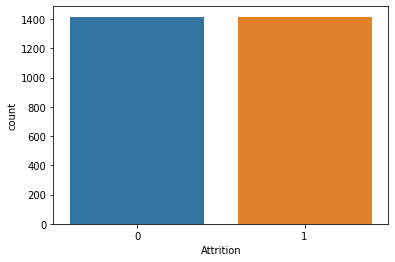

In [337]:
sns.countplot(y_new)

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

## Scaling

In [341]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [342]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Models

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

In [346]:
M1=LinearRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P1))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P1))
print('\n')
print('R2_score:',100*r2_score(y_test,P1))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P1))

mean_absolute_error: 0.20267226607633082


mean_Squared_error: 0.06519138258275599


R2_score: 73.91420411049938


mean_absolute_percentage_error: 453499341428089.7


In [348]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [350]:
M2=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P2))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P2))
print('\n')
print('R2_score:',100*r2_score(y_test,P2))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P2))

mean_absolute_error: 0.201325648334973


mean_Squared_error: 0.08761098273452537


R2_score: 64.94318539125581


mean_absolute_percentage_error: 584053542984706.4


In [351]:
M3=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P3))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P3))
print('\n')
print('R2_score:',100*r2_score(y_test,P3))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P3))

mean_absolute_error: 1307931.0101336972


mean_Squared_error: 3909776210200.212


R2_score: -1564464813481024.2


mean_absolute_percentage_error: 4.460787710536077e+21


In [352]:
from sklearn.linear_model import Lasso

In [353]:
M4=Lasso()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P4))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P4))
print('\n')
print('R2_score:',100*r2_score(y_test,P4))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P4))

mean_absolute_error: 0.5000759779189173


mean_Squared_error: 0.2500922698541038


R2_score: -0.07236610873333493


mean_absolute_percentage_error: 1156353404174496.0


In [355]:
M5=make_pipeline(PolynomialFeatures(degree=3),Lasso())
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P5))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P5))
print('\n')
print('R2_score:',100*r2_score(y_test,P5))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P5))

mean_absolute_error: 0.5000759779189173


mean_Squared_error: 0.2500922698541038


R2_score: -0.07236610873333493


mean_absolute_percentage_error: 1156353404174496.0


In [356]:
from sklearn.linear_model import Ridge

In [357]:
M6=Ridge()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P6))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P6))
print('\n')
print('R2_score:',100*r2_score(y_test,P6))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P6))

mean_absolute_error: 0.20237679292098223


mean_Squared_error: 0.06509752448806896


R2_score: 73.95176065560678


mean_absolute_percentage_error: 452331189642758.0


In [361]:
M7=make_pipeline(PolynomialFeatures(degree=2),Ridge())
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P7))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P7))
print('\n')
print('R2_score:',100*r2_score(y_test,P7))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P7))

mean_absolute_error: 0.15962433775184087


mean_Squared_error: 0.05109350267792287


R2_score: 79.55535487464111


mean_absolute_percentage_error: 423598314824527.4


In [362]:
from sklearn.tree import DecisionTreeRegressor

In [363]:
M8=DecisionTreeRegressor()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P8))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P8))
print('\n')
print('R2_score:',100*r2_score(y_test,P8))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P8))

mean_absolute_error: 0.1011764705882353


mean_Squared_error: 0.1011764705882353


R2_score: 59.51506693028949


mean_absolute_percentage_error: 227829157619919.25


In [364]:
from sklearn.ensemble import RandomForestRegressor

In [365]:
M9=RandomForestRegressor()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P9))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P9))
print('\n')
print('R2_score:',100*r2_score(y_test,P9))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P9))

mean_absolute_error: 0.1367857142857143


mean_Squared_error: 0.04679307253434708


R2_score: 81.27613664852002


mean_absolute_percentage_error: 350838484652165.94


In [366]:
from sklearn.neighbors import KNeighborsRegressor

Text(0, 0.5, 'Error Rate')

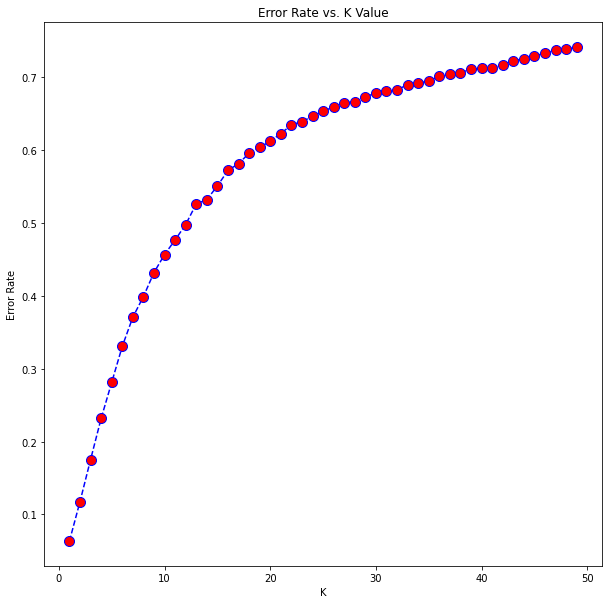

In [367]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [372]:
M10=KNeighborsRegressor(n_neighbors=2)
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P10))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P10))
print('\n')
print('R2_score:',100*r2_score(y_test,P10))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P10))

mean_absolute_error: 0.07176470588235294


mean_Squared_error: 0.0488235294117647


R2_score: 80.46366601868621


mean_absolute_percentage_error: 243724215128285.66


In [373]:
from sklearn.svm import SVR

In [374]:
M11=SVR()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P11))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P11))
print('\n')
print('R2_score:',100*r2_score(y_test,P11))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P11))

mean_absolute_error: 0.13854296677077885


mean_Squared_error: 0.04005612923198602


R2_score: 83.9718691355775


mean_absolute_percentage_error: 340174812726101.3


In [375]:
from sklearn.linear_model import SGDRegressor

In [376]:
M12=SGDRegressor()
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P12))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P12))
print('\n')
print('R2_score:',100*r2_score(y_test,P12))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P12))

mean_absolute_error: 0.22917091888716265


mean_Squared_error: 0.08168789806050186


R2_score: 67.31325903782512


mean_absolute_percentage_error: 525868094639209.1


In [377]:
from sklearn.ensemble import GradientBoostingRegressor

In [378]:
M13=GradientBoostingRegressor()
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P13))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P13))
print('\n')
print('R2_score:',100*r2_score(y_test,P13))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P13))

mean_absolute_error: 0.16841526284461406


mean_Squared_error: 0.05184474113800738


R2_score: 79.25475297976288


mean_absolute_percentage_error: 405181628547451.44


In [379]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [381]:
M14=HistGradientBoostingRegressor()
M14.fit(X_train,y_train)
P14=M14.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P14))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P14))
print('\n')
print('R2_score:',100*r2_score(y_test,P14))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P14))

mean_absolute_error: 0.12412145271196336


mean_Squared_error: 0.03857552507534862


R2_score: 84.56432071879344


mean_absolute_percentage_error: 304966699529084.9


In [382]:
from sklearn.ensemble import AdaBoostRegressor

In [383]:
M15=AdaBoostRegressor()
M15.fit(X_train,y_train)
P15=M15.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P15))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P15))
print('\n')
print('R2_score:',100*r2_score(y_test,P15))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P15))

mean_absolute_error: 0.3056718390993193


mean_Squared_error: 0.10665708956473191


R2_score: 57.32204229566806


mean_absolute_percentage_error: 694672157712820.9


In [384]:
from xgboost import XGBRegressor

In [385]:
M16=XGBRegressor()
M16.fit(X_train,y_train)
P16=M16.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P16))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P16))
print('\n')
print('R2_score:',100*r2_score(y_test,P16))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P16))

mean_absolute_error: 0.12324256589164553


mean_Squared_error: 0.043229225581998994


R2_score: 82.70218071289244


mean_absolute_percentage_error: 323908574555552.8


In [386]:
from catboost import CatBoostRegressor

In [387]:
M17=CatBoostRegressor()
M17.fit(X_train,y_train)
P17=M17.predict(X_test)

Learning rate set to 0.045616
0:	learn: 0.4877813	total: 213ms	remaining: 3m 32s
1:	learn: 0.4768590	total: 220ms	remaining: 1m 49s
2:	learn: 0.4658431	total: 229ms	remaining: 1m 16s
3:	learn: 0.4559283	total: 237ms	remaining: 58.9s
4:	learn: 0.4460021	total: 241ms	remaining: 48.1s
5:	learn: 0.4364713	total: 246ms	remaining: 40.7s
6:	learn: 0.4265977	total: 250ms	remaining: 35.5s
7:	learn: 0.4173693	total: 255ms	remaining: 31.6s
8:	learn: 0.4097390	total: 259ms	remaining: 28.6s
9:	learn: 0.4006725	total: 264ms	remaining: 26.1s
10:	learn: 0.3928085	total: 269ms	remaining: 24.1s
11:	learn: 0.3848150	total: 273ms	remaining: 22.5s
12:	learn: 0.3778497	total: 278ms	remaining: 21.1s
13:	learn: 0.3709650	total: 282ms	remaining: 19.8s
14:	learn: 0.3639936	total: 286ms	remaining: 18.8s
15:	learn: 0.3576632	total: 291ms	remaining: 17.9s
16:	learn: 0.3516017	total: 295ms	remaining: 17.1s
17:	learn: 0.3466559	total: 300ms	remaining: 16.4s
18:	learn: 0.3410071	total: 305ms	remaining: 15.7s
19:	lear

In [388]:
print('mean_absolute_error:',mean_absolute_error(y_test,P17))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P17))
print('\n')
print('R2_score:',100*r2_score(y_test,P17))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P17))

mean_absolute_error: 0.11725182397640113


mean_Squared_error: 0.03351016271982554


R2_score: 86.59118382980047


mean_absolute_percentage_error: 301623239715788.5


In [389]:
from lightgbm import LGBMRegressor

In [390]:
M18=LGBMRegressor()
M18.fit(X_train,y_train)
P18=M18.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P18))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P18))
print('\n')
print('R2_score:',100*r2_score(y_test,P18))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P18))

mean_absolute_error: 0.12276082455890787


mean_Squared_error: 0.038055264203214326


R2_score: 84.77249883041058


mean_absolute_percentage_error: 301754204064858.25


In [391]:
from sklearn.neural_network import MLPRegressor

In [393]:
M19=MLPRegressor()
M19.fit(X_train,y_train)
P19=M19.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,P19))
print('\n')
print('mean_Squared_error:',mean_squared_error(y_test,P19))
print('\n')
print('R2_score:',100*r2_score(y_test,P19))
print('\n')
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,P19))

mean_absolute_error: 0.14297135080413012


mean_Squared_error: 0.04488316493489126


R2_score: 82.04037047565149


mean_absolute_percentage_error: 397885339973620.5
